In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/water_potability_input.csv')
data.head()

FileNotFoundError: ignored

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
data= data.dropna()
data.isnull().sum()

NameError: ignored

In [ ]:
data.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

unbalanced dataset more 0s than 1s

In [ ]:
notpotable  = data[data['Potability']==0]
potable = data[data['Potability']==1]  

from sklearn.utils import resample
df_minority_upsampled = resample(potable, replace = True, n_samples = 1200) 

from sklearn.utils import shuffle
data = pd.concat([notpotable, df_minority_upsampled])
data = shuffle(data) 
data.Potability.value_counts()

0    1200
1    1200
Name: Potability, dtype: int64

EDA

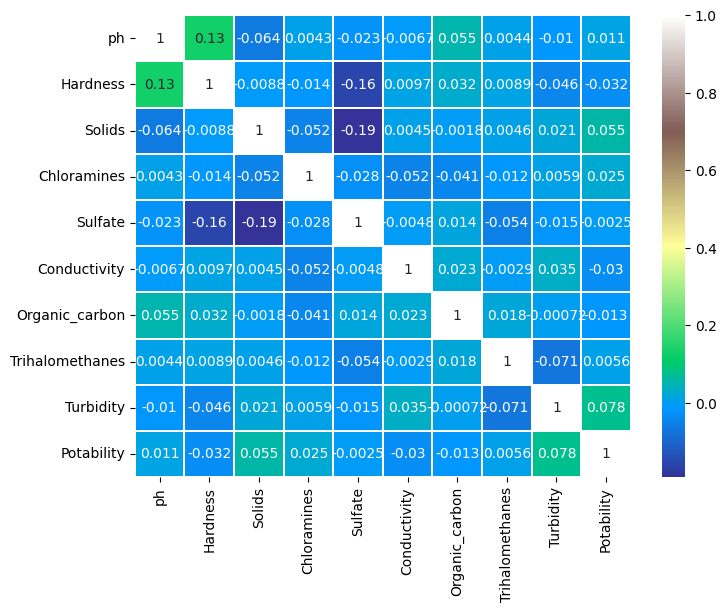

In [ ]:
sns.heatmap(data.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

In [ ]:
corr = data.corr()
corr["Potability"].sort_values(ascending=False)

Potability         1.000000
Turbidity          0.077894
Solids             0.055434
Chloramines        0.024969
ph                 0.011460
Trihalomethanes    0.005601
Sulfate           -0.002496
Organic_carbon    -0.012679
Conductivity      -0.030319
Hardness          -0.031752
Name: Potability, dtype: float64

This plot can help you to visualize the distribution of "Solids" for each value of "Potability" in the dataset. You can observe the shape, center, and spread of the distribution of "Solids" for each class. 

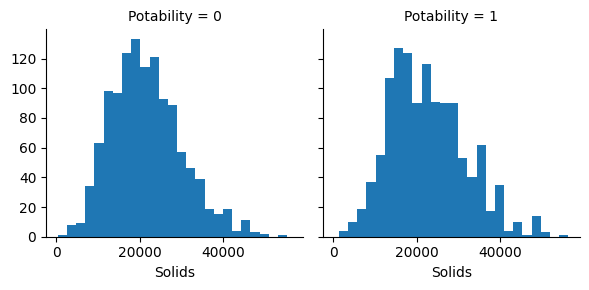

In [ ]:
g = sns.FacetGrid(data, col='Potability')
g.map(plt.hist, 'Solids', bins=25)

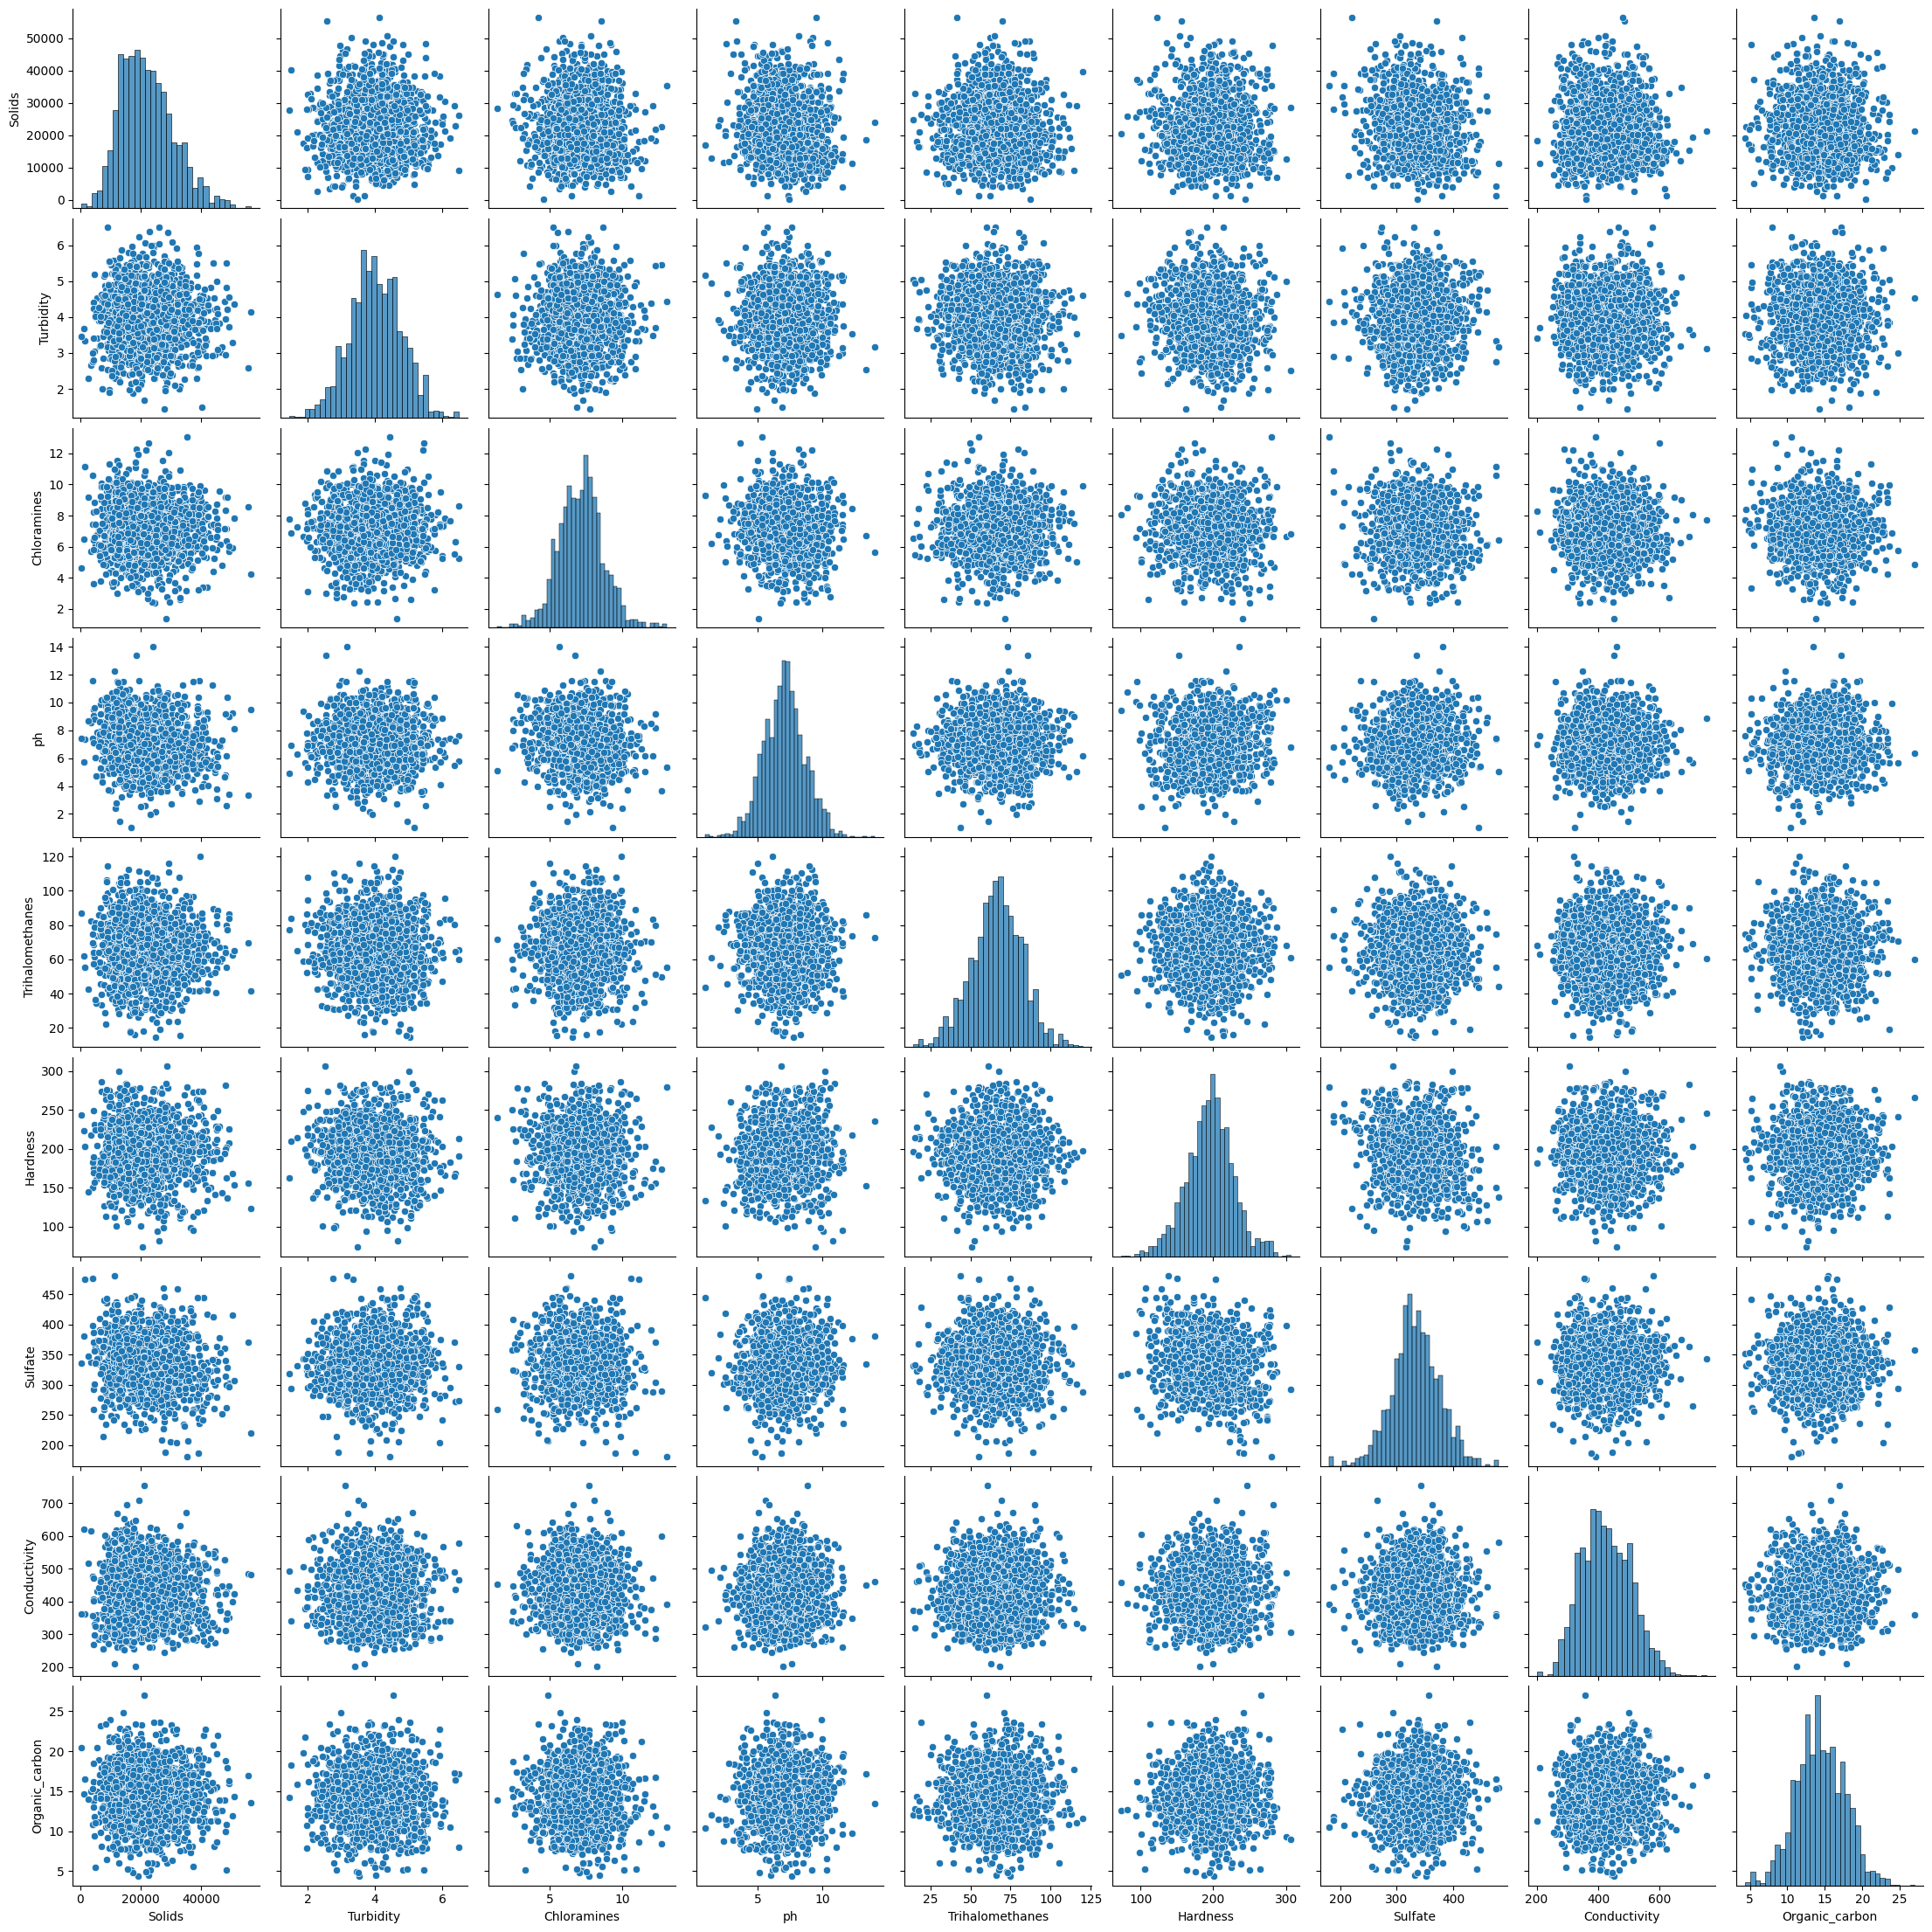

In [ ]:
cols = ['Solids', 'Turbidity', 'Chloramines', 'ph','Trihalomethanes','Hardness','Sulfate'
        ,'Conductivity','Organic_carbon']
sns.pairplot(data[cols])

APPLY ML ALGORITHMS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
#x is the input ,y is the  desired output
x = data.drop(['Potability'], axis = 1)
y = data['Potability']

Applying StandardScaler befor fitting ML model to normalize the features.StandardScaler scales the features of the dataset so that they have a mean of zero and a standard deviation of one. 

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
col= x.columns
x[col] = st.fit_transform(x[col])
x[col]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1328,-0.040488,0.934724,0.113373,-0.806978,-0.308468,0.436758,-0.209794,0.691622,-0.441638
2263,2.624322,-0.504083,1.328526,1.249565,-0.140942,0.009130,1.105314,-0.465243,1.472536
973,-1.670338,1.390714,0.222819,1.709235,0.103966,1.367472,-0.755963,0.168233,1.330828
1255,-0.414233,0.387836,0.540171,-0.037583,-0.693732,-0.084465,1.085474,-1.988772,1.028609
2879,-1.807124,0.199133,-1.024776,-0.138823,0.970231,-0.282481,2.579132,0.636752,0.604325
...,...,...,...,...,...,...,...,...,...
77,-2.126485,-0.964362,1.805899,-0.300431,-0.163474,0.533049,0.063569,-0.995269,-0.458184
3204,0.627253,-2.144145,0.206981,1.060657,-0.375399,-0.336915,0.280607,-0.233173,0.344474
2773,1.370665,1.265491,-1.055200,-0.886676,-1.350348,-1.196473,-0.533081,-0.677595,-0.583589
755,1.772871,0.789727,-0.253280,0.547979,-0.178012,0.448225,0.173839,-0.426405,-0.344588


In [ ]:
#now we can split the data
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.1)
knn = KNeighborsClassifier()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()
para_knn = {'n_neighbors':np.arange(1, 50)}  #parameters of knn
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5) #search knn for 5 fold cross validation

#Decision Tree
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

In [ ]:
grid_knn.fit(X_train, Y_train)
grid_dt.fit(X_train, Y_train)
grid_rf.fit(X_train, Y_train)


print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)

Best parameters for KNN: {'n_neighbors': 1}
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 34, 'min_samples_leaf': 1}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 500}


In [ ]:
models = [('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf)]


for model_name, model in models:
 
    model.fit(X_train, Y_train)    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    print('{:s} : {:.2f}'.format(model_name, accuracy*100))

K Nearest Neighbours : 73.33
Decision Tree : 81.25
Random Forest : 89.17
